## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

###Step1: Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline
   

###Step2: Load the csv files from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive'
df_play_store =  pd.read_csv(path + '/alma better/capstone projects solutions/playstore app review/Play Store Data.csv')
df_user_review =  pd.read_csv(path + '/alma better/capstone projects solutions/playstore app review/User Reviews.csv')

###Step3: Basic data information

####1. Play Store Data

In [ ]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1]:
df_play_store.describe()

NameError: ignored

We can see the maximum value in Rating column which is 19.  Rating can't be 19. It will be 1 to 5, So, This value is wrong here.

In [ ]:
df_play_store.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#For finding the null values in unique column
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#Finding total null values in dataset
df_play_store.isnull().sum().sum()

1487

In [ ]:
#Finding unique values
df_play_store.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

We can see the Type column and Content Rating value have less number number of values

####2. User Review Data

In [ ]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df_user_review.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#For finding the null values in unique column
df_user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
#Finding total null values in dataset
df_user_review.isnull().sum().sum()

107457

In [ ]:
#Finding unique values
df_user_review.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

We can see the Sentiment column value have less number number of values

###Step4: Cleaning the Data

####1. Play Store Data

In [ ]:
#replacing spaces in column names with "-" to access it without errors
df_play_store.columns=[each.replace(" ","_") for each in df_play_store.columns]

#####Review Column

The review column have object as a data type. We will convert it into int data type

In [ ]:

df_play_store.Reviews = df_play_store.Reviews.apply(lambda x: float(str(x).replace('M', '')) if 'M' in str(x) else x) 
df_play_store.Reviews = df_play_store.Reviews.apply(lambda x:int(x))

In [ ]:
#To verify the  null value
df_play_store['Reviews'].isna().any()

False

In [ ]:
#To verify the data type
df_play_store['Reviews'].dtype

dtype('int64')

##### Size Column

We observed that Size column contains the Strings or characters such as "MB", "KB", ",","+" and "Varies with device".

In [ ]:
#We will convert this to float.
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(str(x).replace('k', ''))/1024 if 'k' in str(x) else x) #1MB= 1024KB
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(x))

In [ ]:
#One thing is that, Size can't be zero. So we will check it using describe method and also we can verify data type
df_play_store['Size'].describe()

count    9146.000000
mean       21.623150
std        24.797055
min         0.008301
25%         4.900000
50%        13.000000
75%        30.000000
max      1000.000000
Name: Size, dtype: float64

Here, Minimum value is not zero

In [ ]:
#To check if it contains null values
df_play_store[df_play_store['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [ ]:
# replacing null value in Size column with Mean
df_play_store['Size'].fillna(value=20.35, inplace = True)

#####Installs column

In [ ]:
# Installs column contains the "+","," and "Free". So we will remove "+","," and replace "Free" with "NaN"
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace('Free', 'NaN') if 'Free' in str(x) else x)
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_play_store['Installs']=df_play_store['Installs'].apply(lambda x: float(x))

In [ ]:
#We will check how minimum and maximum number of app installs and also data type
df_play_store['Installs'].describe()

count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#####Price Column

In [ ]:
#Price column have data type object. So, We observed that there are two values minimum and maximum which are not int or float
df_play_store['Price'].min(),df_play_store['Price'].max()

('$0.99', 'Everyone')

In [ ]:
#We will replace "Everyone" with "NaN"
df_play_store['Price'] = df_play_store['Price'].apply(lambda x: str(x).replace('Everyone', 'NaN') if 'Everyone' in str(x) else x)
df_play_store['Price'] = df_play_store['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
df_play_store['Price'] = df_play_store['Price'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
df_play_store['Price']=df_play_store['Price'].apply(lambda x: float(x))

In [ ]:
#To check minimum & maximum price and also to verify data type
df_play_store['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [ ]:
df_play_store.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

#####Rating Column

In [ ]:
#To understand the description
df_play_store['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

As we know, rating should be between 1 to 5. But here we can see max value 19. So, This is outlier here.
We will check the rating column values which are greater than 5

In [ ]:
df_play_store[df_play_store['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Only one value is there and also some of other column values are NaN. So, We will drop it.

In [ ]:
df_play_store.drop([10472],inplace= True)

In [ ]:
df_play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.333818,1.546434e+07,1.027368
std,0.515219,2.927761e+06,20.752127,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#####Type Column

In [ ]:
df_play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.333818,1.546434e+07,1.027368
std,0.515219,2.927761e+06,20.752127,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
df_play_store['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

There are only 3 values


In [ ]:
# We will replace NaN values with free and greater than zero with paid
df_play_store.loc[df_play_store.Price == 0, 'Type'] = "Free"
df_play_store.loc[df_play_store.Price > 0, 'Type'] = "Paid"

In [ ]:
#It's just to verify
df_play_store.Type.unique()

array(['Free', 'Paid'], dtype=object)

#####Android_Ver column

In [ ]:
df_play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.333818,1.546434e+07,1.027368
std,0.515219,2.927761e+06,20.752127,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
df_play_store[df_play_store['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Replace the null values with mode
df_play_store['Android_Ver'].fillna('4.1 and up', inplace = True)

#####Current_Ver column

In [ ]:
df_play_store['Current_Ver'].describe()

count                  10832
unique                  2831
top       Varies with device
freq                    1459
Name: Current_Ver, dtype: object

In [ ]:
df_play_store[df_play_store['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700000,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.010742,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700000,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,0.216797,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14.000000,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.200000,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,0.231445,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,0.642578,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# replace the null values with mode
df_play_store['Current_Ver'].fillna('Varies with device', inplace = True)

#####Check if any column is null

In [ ]:
df_play_store.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          0
Android_Ver          0
dtype: int64

####2. User review data

In [ ]:
df_user_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
df_user_review.Sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
df_user_review.loc[df_user_review['Sentiment'].isna() & df_user_review['Sentiment_Polarity'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


We can see lot of null values present in this data

In [ ]:
# drop null values from dataset

df_user_review.dropna(inplace=True)

In [ ]:
df_user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


###Step5: Merging two dataset

In [ ]:
merged_df = df_play_store.merge(df_user_review, on="App")


In [ ]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667




In merged dataframe you can see we have 4 new columns Translated_Review, Sentiment,Sentiment_Polarity, Sentiment_Subjectivity

###Step6: Data Visualization

#####  Correlation Map: Correlation measures the relationship between two variables. 

In [ ]:
matrix = merged_df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                          Rating   Reviews      Size  Installs     Price  \
Rating                  1.000000  0.129641  0.139240 -0.002768 -0.013279   
Reviews                 0.129641  1.000000  0.362931  0.520766 -0.030794   
Size                    0.139240  0.362931  1.000000  0.109157 -0.016340   
Installs               -0.002768  0.520766  0.109157  1.000000 -0.033153   
Price                  -0.013279 -0.030794 -0.016340 -0.033153  1.000000   
Sentiment_Polarity      0.052034 -0.107390 -0.138503 -0.060528  0.028077   
Sentiment_Subjectivity  0.057132 -0.018063  0.012277 -0.010398  0.007643   

                        Sentiment_Polarity  Sentiment_Subjectivity  
Rating                            0.052034                0.057132  
Reviews                          -0.107390               -0.018063  
Size                             -0.138503                0.012277  
Installs                         -0.060528               -0.010398  
Price                

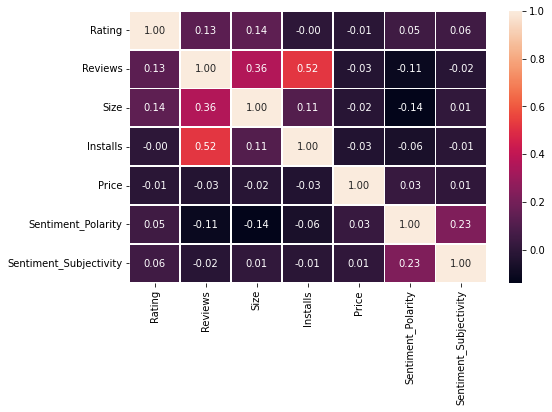

In [ ]:
# below you can see Correlation Matrix using Heatmap to find out corealted row & column.

f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

from above heatmap analysis we can see that Installs and Reviews are Positively Correlated.

#####Now we are checking sentiment subjectivity proportional to sentiment polarity or not?

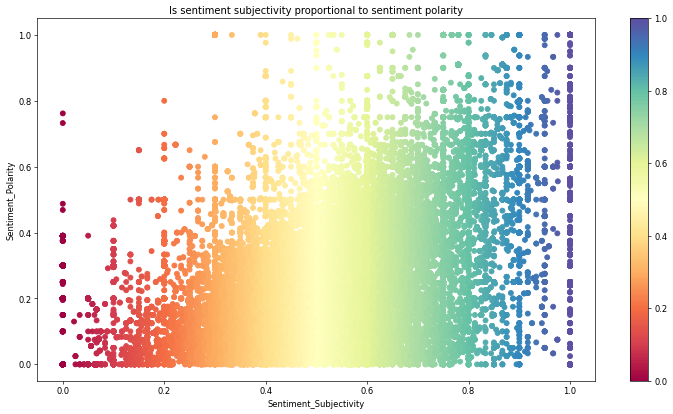

In [ ]:
merged_df['Sentiment_Subjectivity1'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity1'] = merged_df['Sentiment_Polarity'].abs()
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':60})
plt.scatter( merged_df['Sentiment_Subjectivity1'],merged_df['Sentiment_Polarity1'], c=merged_df['Sentiment_Subjectivity1'], cmap='Spectral')
plt.colorbar()
plt.title("Is sentiment subjectivity proportional to sentiment polarity")
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Sentiment_Polarity')
plt.show()

we can see here from the above scatter plot analysis sentiment subjectivity is not proportional to sentiment polarity but in many cases,we can see a proportional behavior when variance is very low or high.

#####here we can see how sentiment is divided for different type of reviews by using pie chart.

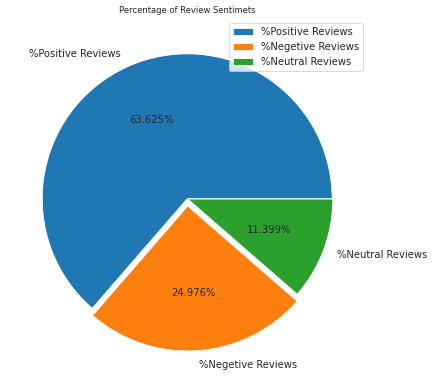

In [ ]:
counts = list(merged_df['Sentiment'].value_counts())
labels = '%Positive Reviews', '%Negetive Reviews','%Neutral Reviews'
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
plt.title('Percentage of Review Sentimets', fontsize=10)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], autopct="%.3f%%")
plt.legend()
plt.axis('off')
plt.show()

Here we concluded as per above pie chart it can be easealy  understood positive user review sentiments is 65%, negative user review sentiment is 22% and neutral user review sentiments is 11.399%

##### Type vs review for each category

Text(0.5, 1.0, 'Types of Reviews for each Category')

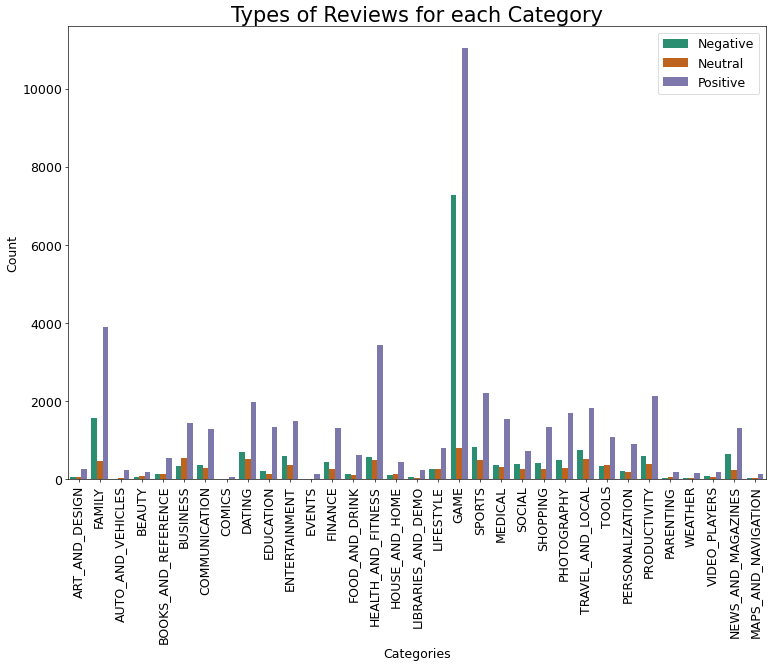

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=merged_df['Category'],hue=merged_df['Sentiment'],orient='y',palette='Dark2')
plt.xticks(fontsize=15 , rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(prop={'size': 15})
plt.title('Types of Reviews for each Category',fontdict={'fontsize':25})

 

*   we can see from above chart, every category is having more Positive
reviews than Negative and Neutral reviews
*   from above analysis we can see health and fitess having high no of positive reviews as compare others
*   from above analysis we can see total highest no of review have Game category and lowest no of reviews have comics category.


#####Top category installed application

In [ ]:
grp=df_play_store.groupby('Category')
x=grp['Installs'].agg(np.sum)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)

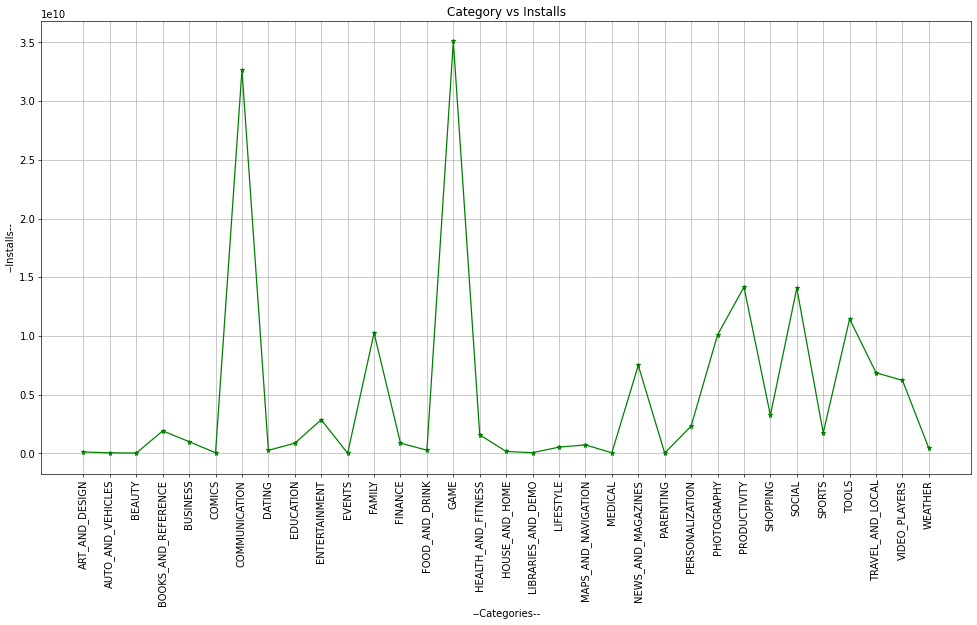

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x ,  color='green', marker='*')
plt.xticks(rotation=90)
plt.xlabel('--Categories--')
plt.ylabel('--Installs--')
plt.title('Category vs Installs')
plt.grid()
plt.show()

##### We have Concluded from above chart there is highest number of app installed category is Game.

#####**Top** 10 Geners installed for Game category.

In [ ]:
#checking how many games is there in dataset
gaming_apps = df_play_store[df_play_store['Category']==('GAME')]
print('The dataset contains '+ (str((gaming_apps.App.nunique())))+ ' game apps.')

The dataset contains 960 game apps.


In [ ]:
# Assosiate the Genres for gaming Category
gaming_df = gaming_apps[game_apps['Category']==('GAME')]
gaming_df = gaming_df[['Genres', 'Installs']]
game_genre_df = gaming_df.groupby('Genres').count().sort_values(by='Installs',ascending=False)
game_genre_df = game_genre_df.nlargest(10, 'Installs', keep='first')


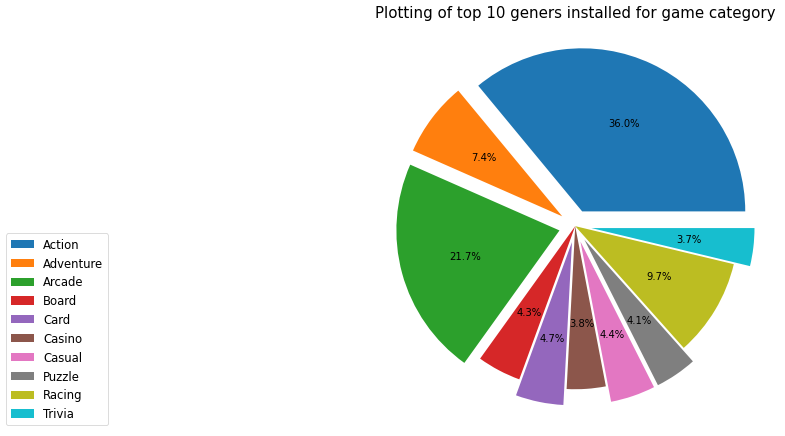

In [ ]:
# Plotting of top 10 geners installed for game category
top_10_genres=game_genre_df.groupby("Genres")["Installs"].sum()
fig7, ax = plt.subplots(figsize = (15,9))
explode = (0.1,0.1,0.1,0,0.1,0,0.1,0.1,0,0.1)
labels=top_10_genres.index
ax.set(facecolor = 'grey')
pie = plt.pie(top_10_genres, explode= explode,startangle=0,autopct='%1.1f%%')
plt.legend(pie[0],labels, bbox_to_anchor=(0,0.5), fontsize=14, 
           bbox_transform=plt.gcf().transFigure,)
plt.title('Plotting of top 10 geners installed for game category', fontsize = 18)
plt.show()

From above pie chart analysis Action And Adventure having more no of percentage as well as Trivia and Casio having lowest no percentage##

#####**Paid apps vs Free apps**

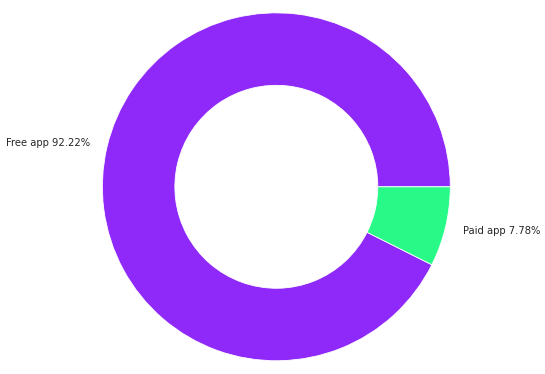

In [ ]:
size_of_groups=[9592,766]

colors = ['#8e29f9','#29f987']
mylabels = ["Free app 92.22%","Paid app 7.78%"]
my_pie,_ = plt.pie(size_of_groups,radius = 1.2,labels = mylabels,colors=colors)

plt.setp(my_pie, width=0.5, edgecolor='white') 

plt.show()

From above analysis we can see 92.22% percentage of free app and 7.78% of paid app.

##### Plotting the bar plot of category vs istalls vs type (paid)

In [ ]:
# free app
free=df_play_store[df_play_store['Type']=='Free']

In [ ]:
paid=df_play_store[df_play_store['Type']=='Paid']

In [ ]:
# Plotting the bar plot of category vs installs vs type(paid app)
fig = px.bar(paid, x='Category', y='Installs',
             title='Rating vs Installs vs Type',height=700,)
fig.update_layout(title="---Category vs Installs vs Type(paid---)",xaxis_title="---Category---",yaxis_title="---Installs---")

fig.show()

From above analysis we can see highest number of paid type category are family & Game 

#####Plotting the bar plot category vs installs vs type(Free)

In [ ]:
# Plotting the bar plot
fig = px.bar(free, x='Category', y='Installs',
             title='Rating vs Installs vs Type',height=700,)
fig.update_layout(title="---Category vs Installs vs Type(Free)---",xaxis_title="---Category---",yaxis_title="---Installs---",)

fig.show()

From above analysis we can see highest number of free type category are Game & communication

##### Plotting of Free vs Paid polarity

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text major ticklabel objects>)

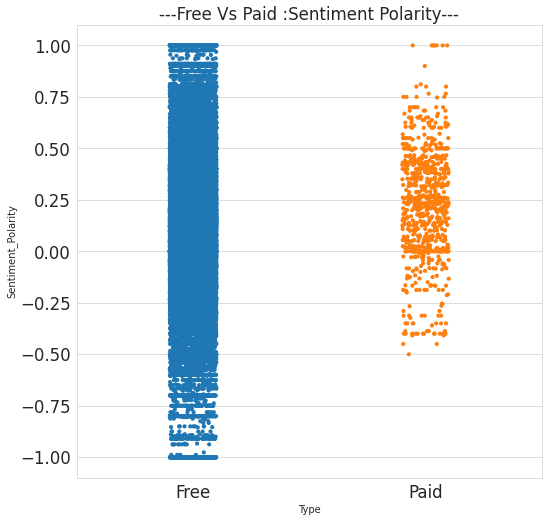

In [ ]:
# Plotting of Free vs Paid polarity
plt.figure(figsize=(10,10))
sns.stripplot(x=merged_df['Type'],y=merged_df['Sentiment_Polarity'],jitter=True)
plt.title('---Free Vs Paid :Sentiment Polarity---',fontdict={'fontsize':20})
sns.set_style("whitegrid")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

from above Polarity graph clearly shows that Paid Apps are having less bad reviews and Free apps having a equal distribution of Setiment Polarity.

#####Find out which content rating have highest number of installed Application

In [ ]:
top_Content_Rating = df_play_store.Content_Rating.value_counts().reset_index().rename(columns={'Content_Rating':'Count','index':'Content_Rating'})
Content_Rating_installs = df_play_store.groupby(['Content_Rating'])[['Installs']].sum()
top_Content_Rating_installs = pd.merge(top_Content_Rating, Content_Rating_installs, on='Content_Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



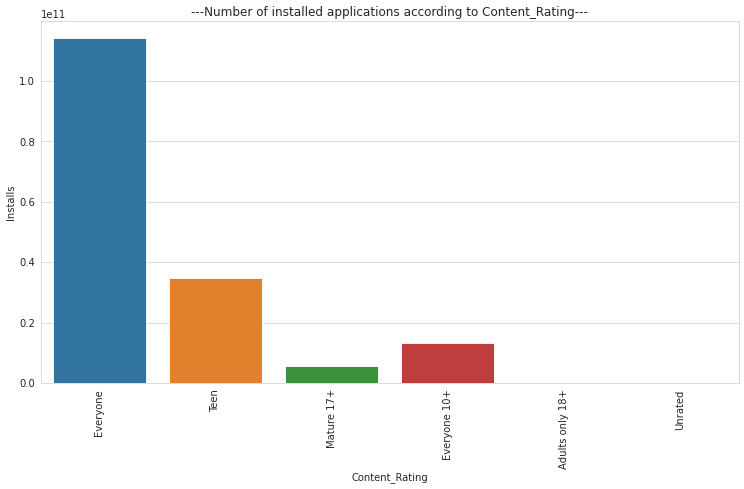

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.xlabel("---Content_Rating---")
plt.ylabel("---Installs---")
plt.title("---Number of installed applications according to Content_Rating---")
sns.barplot(top_Content_Rating_installs.Content_Rating, top_Content_Rating_installs.Installs)
plt.show()

**from above plot we can see highest number of installed application Content Rating is everyone.**

##**Conclusion**

*   Here we concluded as per above pie chart it can be easealy  understood positive user review sentiments is 65%, negative user review sentiment is 22% and neutral user review sentiments is 11.399%
* Positive reviews has more pecentage than Negative and Neutral reviews
* health and fitess having high no of positive reviews as compare others
* total highest no of review have Game category and lowest no of reviews have comics category.
* highest number of app installed category is Game.
* Action And Adventure having more no of percentage as well as Trivia and Casio having lowest no percentage
* highest number of paid type category are family & Game
*highest number of free type category are Game & communication
*Paid Apps are having less bad reviews and Free apps having a equal distribution of Setiment Polarity.
*highest number of installed application Content Rating is everyone.